# 🧬 Introduction to Biopython

This notebook provides a concise, hands-on introduction to **Biopython**, one of the most widely used Python libraries for biological data analysis.  
It covers the basics of working with biological sequences, interacting with online databases (NCBI Entrez), and performing simple analyses such as computing GC content.

The goal is to give readers a practical starting point for using Biopython in real bioinformatics workflows.



## 🧭 What is Biopython? A short history
- **Biopython** is an open-source toolkit (since ~1999) for biological computation in Python.
- Founded by **Jeff Chang** and **Brad Chapman** and developed under the **Open Bioinformatics Foundation**.
- Part of the broader "Open Bio" ecosystem (siblings: **BioPerl**, **BioJava**, **BioRuby**).
- Provides utilities for **sequences, file formats**, **Entrez (NCBI)**, **alignments**, **PDB**, phylogenetics, and more.
- Actively maintained with contributions from the community and widely used in research and teaching.



## 🧬 Core Concepts: `Seq` and `SeqRecord`

Biopython represents biological sequences using two fundamental objects:

---

#### **`Seq` — the sequence data model**

`Seq` stores DNA, RNA, or protein sequences and provides biologically meaningful operations, such as:

- `complement()`  
- `reverse_complement()`  
- `transcribe()`  
- `translate()`

These methods mimic real biological processes, making sequence manipulation intuitive.

**Example:**


In [1]:
from Bio.Seq import Seq

dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

print("DNA:", dna)
print("Complement:", dna.complement())
print("Reverse complement:", dna.reverse_complement())
print("Protein:", dna.translate())

DNA: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
Complement: TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
Reverse complement: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
Protein: MAIVMGR*KGAR*



#### **`SeqRecord` — sequence + metadata**

`SeqRecord` extends `Seq` by adding:

* `id`
* `description`
* `annotations`
* optional features (e.g., gene locations)

This is the standard structure used when parsing FASTA or GenBank files.

**Example:**


In [2]:
from Bio.SeqRecord import SeqRecord

record = SeqRecord(
    seq=dna,
    id="Example1",
    description="Demo sequence for SeqRecord"
)

print(record.id)
print(record.description)
print(record.seq)

Example1
Demo sequence for SeqRecord
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG



Together, `Seq` and `SeqRecord` form the foundation of almost all sequence-related workflows in Biopython.


## 🌐 Connecting with biological databases

One of the most common tasks in bioinformatics is retrieving information from **biological databases**.  
Doing this manually is time-consuming and repetitive — Biopython helps automate it.

Biopython provides direct programmatic access to several major databases:

- **Entrez** (and **PubMed**) from the NCBI — for gene, sequence, and literature data.  
- **ExPASy** — for protein-related information such as Swiss-Prot entries.  
- **SCOP** — for protein structural classification.

These modules let you interact with online database APIs and CGI scripts directly from Python,  
returning results in structured, easy-to-parse formats that integrate smoothly with Biopython objects.

> In this notebook, we will primarily use **Entrez** to fetch and analyze real sequences from NCBI.


## 🪄 Setup

In [2]:
# !pip install biopython
from Bio import SeqIO, Entrez
from Bio.Seq import Seq
import io
import matplotlib.pyplot as plt

Entrez.email = "melikagoharix@gmail.com" 
print("Imports ready.")


Imports ready.



## 🔎 Fetching a real sequence from NCBI (Entrez)
We'll fetch a human gene transcript by accession and inspect the sequence.


In [3]:

accession = "NM_007294"  # BRCA1 transcript (Homo sapiens)
with Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text") as handle:
    record = SeqIO.read(io.StringIO(handle.read()), "fasta")
print(record.description)
print("Length:", len(record.seq), "nt")
print("First 100 nt:", str(record.seq)[:100], "...")


NM_007294.4 Homo sapiens BRCA1 DNA repair associated (BRCA1), transcript variant 1, mRNA
Length: 7088 nt
First 100 nt: GCTGAGACTTCCTGGACGGGGGACAGGCTGTGGGGTTTCTCAGATAACTGGGCCCCTGCGCTCAGGAGGCCTTCACCCTCTGCTCTGGGTAAAGTTCATT ...



## 🧪 Mini Project — GC Content of multiple human genes
**Goal:** Fetch several real genes from NCBI and compare their GC% in a simple plot.

We'll use a small list of well-known tumor suppressors and related genes:
`TP53 (NM_000546)`, `BRCA1 (NM_007294)`, `PTEN (NM_000314)`, `APC (NM_000038)`


NM_000546.6: length=2512 nt, GC%=53.38
NM_007294.4: length=7088 nt, GC%=41.77
NM_000314.8: length=8515 nt, GC%=36.72
NM_000038.6: length=10704 nt, GC%=39.60


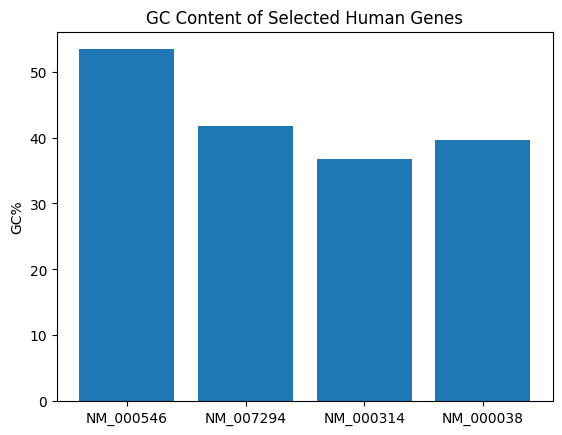

In [4]:

ids = ["NM_000546", "NM_007294", "NM_000314", "NM_000038"]
gc_values, lengths = [], []

def gc_percent(seq):
    s = str(seq).upper().replace("N", "")
    return 0.0 if not s else 100.0 * (s.count("G") + s.count("C")) / len(s)

for acc in ids:
    with Entrez.efetch(db="nucleotide", id=acc, rettype="fasta", retmode="text") as handle:
        rec = SeqIO.read(io.StringIO(handle.read()), "fasta")
        gc = gc_percent(rec.seq)
        gc_values.append(gc)
        lengths.append(len(rec.seq))
        print(f"{rec.id}: length={len(rec.seq)} nt, GC%={gc:.2f}")

plt.figure()
plt.bar(range(len(ids)), gc_values)
plt.xticks(range(len(ids)), ids)
plt.ylabel("GC%")
plt.title("GC Content of Selected Human Genes")
plt.show()


## 🧰 Other Uses of Biopython

Beyond basic sequence manipulation, Biopython includes a wide range of tools that support many areas of bioinformatics.  
Some of the most useful capabilities include:

### 🔹 Multiple Sequence Alignment (MSA)
- Running alignment tools (Clustal Omega, MUSCLE)  
- Parsing alignment files (`Bio.AlignIO`)  
- Computing alignment statistics  

### 🔹 BLAST Integration
- Submitting BLAST queries (`NCBIWWW.qblast`)  
- Parsing BLAST XML outputs (`Bio.Blast.NCBIXML`)  
- Extracting best hits, HSPs, scores, E-values  

### 🔹 Protein Structure Analysis (Bio.PDB)
- Loading and analyzing PDB structures  
- Extracting chains, residues, atoms  
- Calculating distances and geometric features  
- Useful in structure prediction, docking, and MD  

### 🔹 Phylogenetics
- Parsing alignment results  
- Exporting trees to formats like Newick  
- Working with `Bio.Phylo` for visualization and traversal  

### 🔹 Reading and Writing Bioinformatics File Formats
- FASTA, GenBank, Swiss-Prot  
- Clustal, Phylip, Stockholm  
- GFF, PDB, FASTQ  
- Converting between formats using `SeqIO.convert()`  

### 🔹 Accessing Online Databases
- NCBI Entrez (nucleotide, protein, PubMed, taxonomy)  
- ExPASy (Swiss-Prot)  
- SCOP protein classification  

### 🔹 Codon Usage & Translation Tools
- Generating codon tables  
- Back-translation of protein sequences  
- Calculating codon usage frequencies  

### 🔹 Sequence Motif Analysis
- Basic motif search with regex  
- Working with PWM (position-weight matrices)  
- Identifying transcription factor binding sites (TFBS patterns)  

### 🔹 Working with Next-Generation Sequencing (NGS) Formats
- Reading FASTQ  
- Parsing SAM/BAM headers (light support)  
- Quality score analysis  

---

Biopython acts as a versatile toolkit that connects many different areas of computational biology, making it a powerful companion for research pipelines and teaching.



## 🚀 Project ideas (easy-to-start)
1. **FASTA batch analyzer**: Given a folder of FASTA files, compute GC%, AT%, N%, and length stats and write a CSV summary.  
2. **Motif finder CLI**: Command-line tool that searches DNA sequences for known motifs (e.g., restriction sites, TATA box) and reports positions.  
3. **Gene fetcher**: From a list of accessions, download sequences via Entrez and save a single multi-FASTA file for downstream analysis.  
4. **Translation comparator**: Translate orthologous sequences (e.g., human vs mouse) and highlight conserved amino-acid runs.



## ✅ Summary
- Biopython lets you handle **biological file formats**, **sequences**, and **databases (NCBI)** in a few lines.  
- The mini project showed **real data** → **GC%** → **quick visualization**.  
- Extend the notebook with alignments, BLAST wrappers, or PDB parsing for structural biology.


## 🔗 References & Acknowledgment

This notebook includes summarised explanations and concepts adapted from the official **Biopython Tutorial & Cookbook**:

https://biopython.org/docs/latest/Tutorial/ 

All rights belong to the original authors.  
This work is for educational purposes and does not claim ownership of the original content.

Other resources:
- Open Bioinformatics Foundation: https://www.open-bio.org/  
- NCBI Entrez Utilities: https://www.ncbi.nlm.nih.gov/books/NBK25500/
